In [ ]:
from google.colab import drive

In [ ]:
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import numpy as np,pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
data_table=pd.read_csv("/content/drive/MyDrive/Datasets/Classification_train.csv")

In [ ]:
data=data_table.to_numpy()

In [ ]:
y_total=data[:,0]
y=y_total[:25000]
y_cv=y_total[25000:]

In [ ]:
x_train=data[:,1:]
x=x_train/255
x_cv=x[25000:]
x=x[:25000]
x=x.T
y=y.reshape(1,x.shape[1])
x_cv=x_cv.T
y_cv=y_cv.reshape(1,x_cv.shape[1])

In [ ]:
def sigmoid(z):
    g = 1/(1+np.exp(-z))
    return(g)

In [ ]:
def gradient_descent(x,y,alpha,iterations):
  n,m=np.shape(x)
  w=np.zeros((n,10))
  b=np.zeros((1,10))
  cf=[]
  itera=[]
  for i in range(1,iterations+1):
    z=np.dot(w.T,x)+b.T
    a=sigmoid(z)
    dj_dw=(1/m)*np.dot(a-y,x.T)
    dj_db=(1/m)*np.sum(a-y)
    w=w-alpha*dj_dw.T
    b=b-alpha*dj_db.T
    if (i%500==0):
      cost=-(1/m)*np.sum(y*np.log(a)+(1-y)*np.log(1-a))
      print("Iterations: ",i,end="    ")
      print("Cost : ",cost)
      cf.append(cost)
      itera.append(i)
  print("Total Iterations taken: ",iterations)
  print("Cost: ",cost)
  return(w,b,cf,itera)

In [ ]:
def y_change(y,q):
  y_changed=np.zeros((np.shape(y)))
  m=np.shape(y)[1]
  for i in range(m):
    if(y[0,i]==q):
      y_changed[0,i]=1
    else:
      y_changed[0,i]=0
  return(y_changed)

In [ ]:
y_changed=np.zeros((10,25000))
for i in range(10):
  y_temp=y_change(y,i)
  y_changed[i]=y_temp
w,b,cf,itera=gradient_descent(x,y_changed,5,3000)


Iterations:  500    Cost :  0.26642289257089274
Iterations:  1000    Cost :  0.24069780980808747
Iterations:  1500    Cost :  0.22706841128413954
Iterations:  2000    Cost :  0.21799080471435225
Iterations:  2500    Cost :  0.21127016909453972
Iterations:  3000    Cost :  0.20597674602668883
Total Iterations taken:  3000
Cost:  0.20597674602668883


In [ ]:
y_hat=np.zeros(y.shape)
for i in range(25000):
  s=np.zeros((10,))
  q=x[:,i]
  for j in range(10):
    z=np.dot(w[:,j],q.T)+b[:,j]
    a=sigmoid(z)
    s[j]=a
  m=np.argmax(s)
  y_hat[0,i]=m

In [ ]:
correct=0
for i in range(np.shape(y_hat)[1]):
  if(y_hat[:,i]-y[:,i])==0:
    correct+=1
accuracy=(correct/25000)*100
print("The Accuracy for training set is: ",accuracy,"%")
print("Now lets check the accuracy with cross validation set")

The Accuracy for training set is:  97.792 %
Now lets check the accuracy with cross validation set


In [ ]:
y_predicted=np.zeros(np.shape(y_cv))

In [ ]:
for i in range(5000):
  s=np.zeros((10,))
  q=x_cv[:,i]
  for j in range(10):
    z=np.dot(w[:,j],q.T)+b[:,j]
    a=sigmoid(z)
    s[j]=a
  m=np.argmax(s)
  y_predicted[0,i]=m

In [ ]:
correct=0
for i in range(np.shape(y_predicted)[1]):
  if(y_predicted[:,i]-y_cv[:,i])==0:
    correct+=1
accuracy=(correct/5000)*100
print("The Accuracy for cross validation set is: ",accuracy,"%")
print("As is it a pretty good accuracy hence we can finalise this value of k")

The Accuracy for cross validation set is:  96.7 %
As is it a pretty good accuracy hence we can finalise this value of k


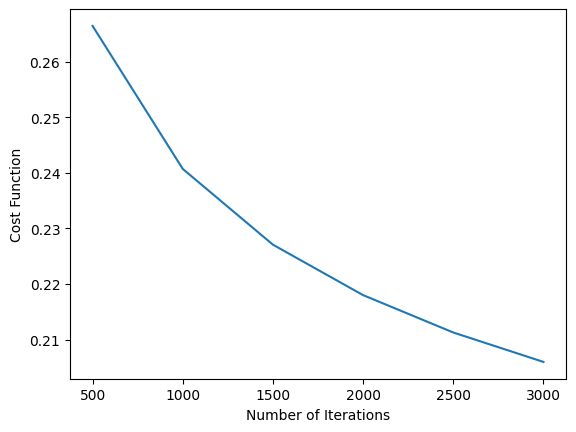

In [ ]:
plt.plot(itera,cf)
plt.xlabel("Number of Iterations")
plt.ylabel("Cost Function")
plt.show()

In [ ]:
data_table_test=pd.read_csv("/content/drive/MyDrive/Datasets/Classification_test.csv")
data_test=data_table_test.to_numpy()

In [ ]:
x_test=data_test[:,1:]
x_test=x_test.T
x_test=x_test/255
y_test=np.zeros((1,10000))

In [ ]:
for i in range(10000):
  s=np.zeros((10,))
  q=x_test[:,i]
  for j in range(10):
    z=np.dot(w[:,j],q.T)+b[:,j]
    a=sigmoid(z)
    s[j]=a
  m=np.argmax(s)
  y_test[0,i]=m

In [ ]:
y_test_pd=pd.DataFrame(y_test.T)

In [ ]:
y_test_pd.to_csv("Result_Logistic_regression.csv")
from google.colab import files
files.download('Result_Logistic_regression.csv')